# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

value a = 0.5


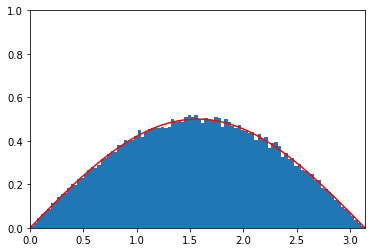

In [2]:
from sympy import *
from sympy.abc import k
from scipy.stats import uniform

a = float(1/(integrate(sin(k),(k,0,np.pi))).evalf())
print(f'value a = {a}')

def f(x):
    return a*np.sin(x)

eta = uniform()
eta_rvs = eta.rvs(size=100000)
f_eta_rvs = np.arcsin(eta_rvs/a-1) + np.pi/2
plt.hist(f_eta_rvs, density=True, bins=100)
x = np.arange(0, np.pi, 0.01)
y = f(x)
plt.ylim(0,1)
plt.xlim(0,np.pi)

plt.plot(x, y, 'r')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

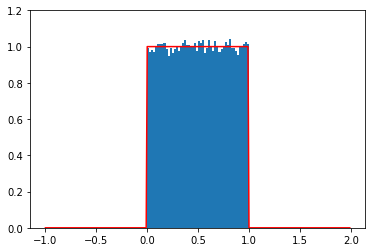

In [3]:
eta = uniform()
eta_rvs = eta.rvs(size=100000)
f_eta_rvs = eta.ppf(eta_rvs)

plt.hist(f_eta_rvs, density=True, bins=50)
x = np.arange(-1, 2, 0.01)
y = eta.pdf(x)
plt.ylim(0,1.2)

plt.plot(x, y, 'r')
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

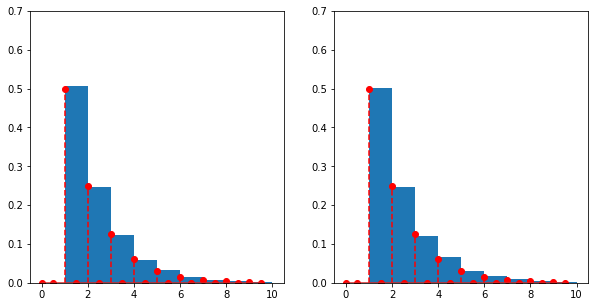

In [4]:
from scipy.stats import geom

p = 0.5
g = geom(p)
x = np.arange(0, 10, 0.5)
y = g.pmf(x)

rvs_1 = g.rvs(size=10000)
rvs_2 = rvs_1 - 1
rvs_2 = rvs_2[rvs_2 > 0]

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].hist(rvs_1, density=True, bins = range(11))
axs[0].stem(x, y, '--r', use_line_collection=True, markerfmt = 'ro')
axs[0].set_ylim(0, 0.7)

axs[1].hist(rvs_2, density=True, bins = range(11))
axs[1].stem(x, y, '--r', use_line_collection=True, markerfmt = 'ro')
axs[1].set_ylim(0, 0.7)

plt.show()



## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

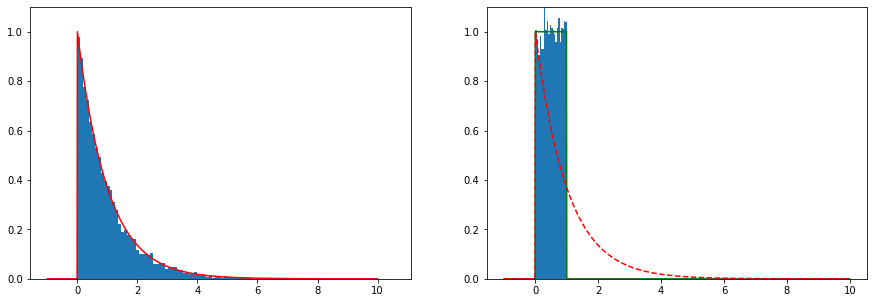

In [5]:
from scipy.stats import expon

xi = expon()

x = np.arange(-1, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = np.exp(-rvs_1)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins='auto')
axs[0].set_ylim(0, 1.1)

def f(x):
    return [1 if 0<y and y<1 else 0 for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'r--')
axs[1].hist(rvs_2, density=True, bins='auto')
axs[1].set_ylim(0, 1.1)

plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

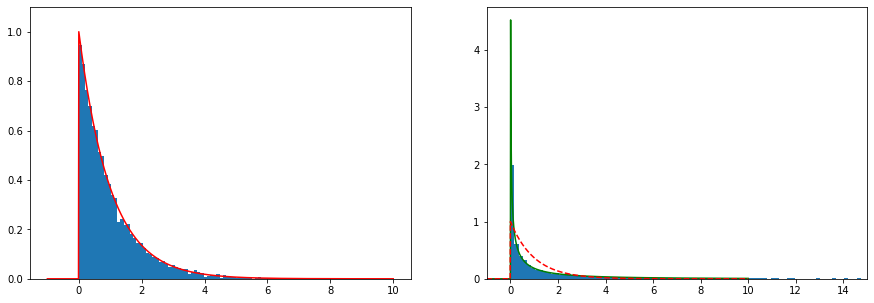

In [6]:
from scipy.stats import expon

xi = expon()

x = np.arange(-1, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = rvs_1**2

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins='auto')
axs[0].set_ylim(0, 1.1)

def f(x):
    return [0 if y<0.0001 else np.exp(-np.sqrt(y))/(2*np.sqrt(y)) for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'r--')
axs[1].hist(rvs_2, density=True, bins='auto')
axs[1].set_xlim(-1, 15)

plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

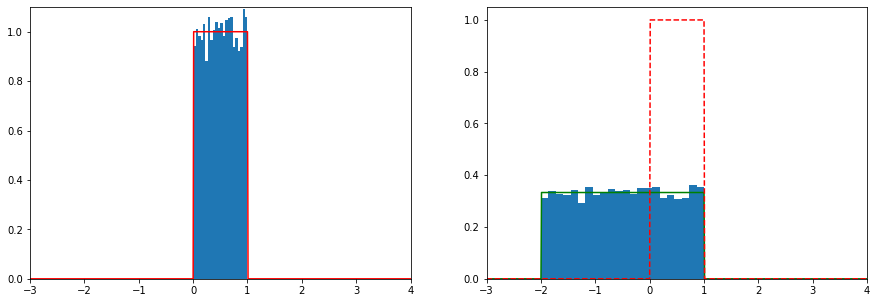

In [7]:
xi = uniform()

x = np.arange(-3, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = 3*rvs_1 - 2

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins='auto')
axs[0].set_ylim(0, 1.1)
axs[0].set_xlim(-3, 4)

def f(x):
    return [0 if y<-2 or y>1 else 1/3 for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'r--')
axs[1].hist(rvs_2, density=True, bins='auto')
axs[1].set_xlim(-3, 4)

plt.show()

### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

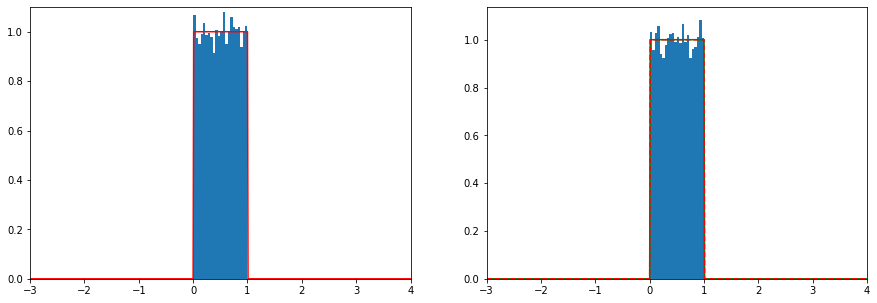

In [8]:
xi = uniform()

x = np.arange(-3, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = np.abs(2*rvs_1 - 1)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins='auto')
axs[0].set_ylim(0, 1.1)
axs[0].set_xlim(-3, 4)

def f(x):
    return [0 if y<0 or y>1 else 1 for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'r--')
axs[1].hist(rvs_2, density=True, bins='auto')
axs[1].set_xlim(-3, 4)

plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

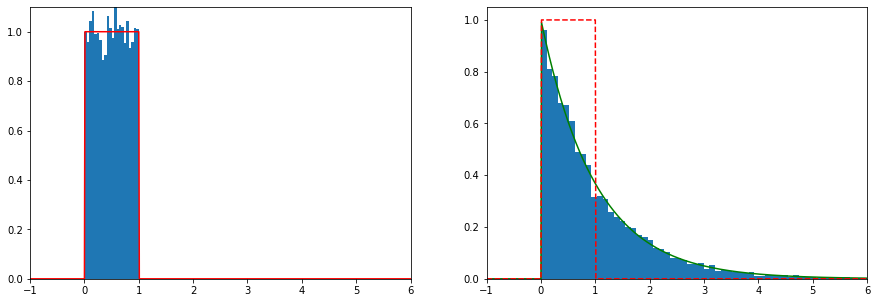

In [9]:
xi = uniform()

x = np.arange(-3, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = -np.log(rvs_1)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins='auto')
axs[0].set_ylim(0, 1.1)
axs[0].set_xlim(-1, 6)

def f(x):
    return [0 if y<0 else np.exp(-y) for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'r--')
axs[1].hist(rvs_2, density=True, bins='auto')
axs[1].set_xlim(-1, 6)

plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [10]:
xi = uniform()
eta = uniform()

x = xi.rvs(size=100000)
y = eta.rvs(size=100000)

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

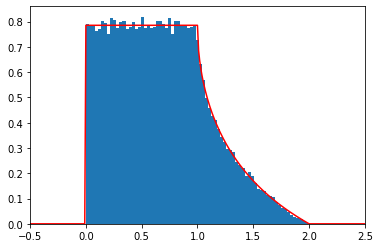

In [11]:
plt.hist(x**2+y**2, density=True, bins='auto')
np.seterr(divide='ignore', invalid='ignore')
def f(x):
    return np.where(np.logical_and(0 <= x, x <= 1), np.pi/4, 0) + np.where(np.logical_and(1 < x, x <= 2), np.pi/4 - np.arccos(1 / np.sqrt(x)) , 0)

x1 = np.arange(-1, 3.01, 0.01)
y1 = f(x1)
plt.xlim(-0.5,2.5)

plt.plot(x1, y1, 'r')

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

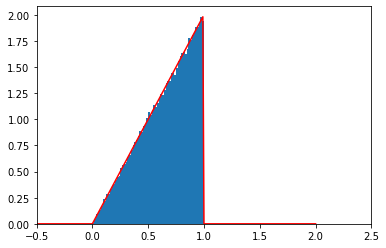

In [12]:
plt.hist(np.maximum(x,y), density=True, bins='auto')

def f(x):
    return [0 if y<0 or y > 1 else 2*y for y in x]

x1 = np.arange(-1, 2.01, 0.01)
y1 = f(x1)
plt.xlim(-0.5,2.5)

plt.plot(x1, y1, 'r')

plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

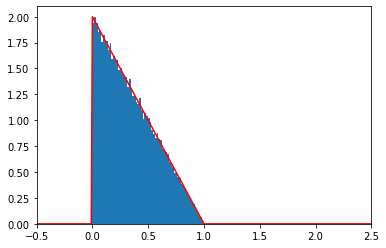

In [13]:
plt.hist(np.abs(x-y), density=True, bins='auto')

def f(x):
    return [0 if y<0 or y > 1 else -2*y+2 for y in x]

x1 = np.arange(-1, 3.01, 0.01)
y1 = f(x1)
plt.xlim(-0.5,2.5)

plt.plot(x1, y1, 'r')

plt.show()